# Proyek Analisis Data:Air Quality Changping
- **Nama:** Angel Martha Pradina Pangaribuan
- **Email:** M001D4KX1697@bangkit.academy
- **ID Dicoding:** M001D4KX1697

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 :

PT. Envirocare, yang rutin meluncurkan produk musim dingin setiap dua tahun sekali, ingin meningkatkan strategi pemasaran untuk peluncuran produk musim dingin 2018. Manajemen menyadari bahwa penjualan sebelumnya dipengaruhi oleh kondisi cuaca yang kurang mendukung di beberapa bulan. Untuk memastikan kesuksesan peluncuran produk tahun ini, manajer pemasaran meminta tim data analyst untuk menganalisis polusi udara, khususnya konsentrasi partikulat PM10. Kapan waktu yang tepat untuk peluncuran produk baru berdasarkan analisis tren polusi udara di setiap bulannya?

- Pertanyaan 2 :

Dalam menentukan waktu peluncuran juga dibutuhkan informasi mengenai tingkat suhu di udara karena produk yang akan diluncurkan sangat berhubungan dengan itu. Sehingga dibutuhkan informasi Pada bulan dan tanggal berapa saja suhu udara memiliki kadar tinggi di tahun 2016?


## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import calendar
from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

#### Data yang akan digunakan adalah data Air Quality untuk Stasiun Changping

In [4]:
df = pd.read_csv("/content/drive/My Drive/Data/PRSA_Data_Changping.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


### Assessing Data

#### Memeriksa tipe data dari tiap kolom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Dataset ini mencakup 17 variabel yang menggambarkan berbagai aspek terkait kondisi udara dan cuaca. Setiap variabel memberikan informasi yang berbeda:

1. year: Tahun dari data pada baris ini.
2. month: Bulan dari data pada baris ini.
3. day: Hari dari data pada baris ini.
4. hour: Jam dari data pada baris ini.
5. PM2.5: Konsentrasi PM2.5 (partikulat matter dengan diameter kurang dari 2.5 mikrometer) dalam satuan mikrogram per meter kubik (ug/m^3).
6. PM10: Konsentrasi PM10 (partikulat matter dengan diameter kurang dari 10 mikrometer) dalam satuan mikrogram per meter kubik (ug/m^3).
7. SO2: Konsentrasi SO2 (dioksida sulfur) dalam satuan mikrogram per meter kubik (ug/m^3).
8. NO2: Konsentrasi NO2 (dioksida nitrogen) dalam satuan mikrogram per meter kubik (ug/m^3).
9. CO: Konsentrasi CO (karbon monoksida) dalam satuan mikrogram per meter kubik (ug/m^3).
10. O3: Konsentrasi O3 (ozon) dalam satuan mikrogram per meter kubik (ug/m^3).
11. TEMP: Temperatur udara dalam derajat Celsius.
12. PRES: Tekanan udara dalam hektopascal (hPa).
13. DEWP: Titik embun, yaitu suhu di mana uap air di udara mulai mengembun menjadi cairan, dalam derajat Celsius.
14. RAIN: Curah hujan dalam milimeter (mm).
15. wd: Arah angin.
16. WSPM: Kecepatan angin dalam meter per detik (m/s).
17. station: Nama situs pemantauan kualitas udara.

In [6]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [7]:
variabel = ['year', 'month', 'day', 'hour']
df[variabel] = df[variabel].astype('category')

In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Cleaning Data

#### Handling Duplicate Data


In [8]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


#### Terlihat bahwa tidak terdapat data yang duplikat

#### Missing Values

In [9]:
df.isna().count()

No         35064
year       35064
month      35064
day        35064
hour       35064
PM2.5      35064
PM10       35064
SO2        35064
NO2        35064
CO         35064
O3         35064
TEMP       35064
PRES       35064
DEWP       35064
RAIN       35064
wd         35064
WSPM       35064
station    35064
dtype: int64

Dari hasil pengecekan terlihat bahwa terdapat permasalahan missing value pada beberapa variabel sehingga diperlukan penanganan

1. Data numerik : Berisi nilai konstan untuk data numerik yang terdapat missing value dengan fillna()

In [10]:
# Fill missing values with the mean of each column
df_filled_mean = df.fillna(df.mean())
df_filled_mean

<ipython-input-10-a873915cf657>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_mean = df.fillna(df.mean())


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.000000,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.000000,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.000000,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.000000,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.000000,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,57.940003,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.000000,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.000000,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.000000,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [11]:
df_filled_mean.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64

2. Data Kategorik : mengisi missing value dengan nilai yang sering muncul untuk data kategorik menggunakann fillna()

In [16]:
df_filled_mean['wd'].fillna(df_filled_mean['wd'].mode()[0],inplace=True)

In [13]:
df_filled_mean.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Missing value berhasil ditangani

## Exploratory Data Analysis (EDA)

### Explore Parameter Statistik

In [17]:
df_filled_mean.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.0,35064.0,35064.0,35064.0,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,5.0,12.0,31.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,2016.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,8784.0,2976.0,1152.0,1461.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064
mean,17532.500000,NaN,NaN,NaN,NaN,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,NaN,NaN,NaN,NaN,71.524179,82.746329,20.786642,29.237672,1078.866266,53.846809,11.356720,10.218370,13.811648,0.752352,NaN,1.309005,NaN
min,1.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,NaN,NaN,NaN,NaN,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,NaN,NaN,NaN,NaN,48.000000,74.000000,7.000000,37.000000,800.000000,47.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,NaN,NaN,NaN,NaN,98.000000,129.000000,18.000000,60.000000,1400.000000,79.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'NO2'}>,
        <Axes: title={'center': 'CO'}>],
       [<Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>,
        <Axes: title={'center': 'PRES'}>],
       [<Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>]], dtype=object)

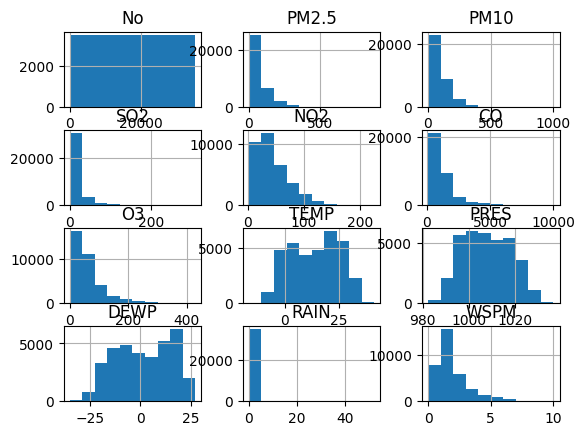

In [18]:
df_filled_mean.hist()

In [19]:
df_filled_mean.corr()

<ipython-input-19-cb6ffe540ab3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_mean.corr()


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,-0.055179,-0.050307,-0.256381,0.059221,0.048495,-0.116823,-0.133789,0.169030,-0.080402,0.004270,0.061205
PM2.5,-0.055179,1.000000,0.858521,0.452324,0.668824,0.741767,-0.096046,-0.108362,0.007106,0.116757,-0.008511,-0.269830
PM10,-0.050307,0.858521,1.000000,0.419447,0.631203,0.657871,-0.049817,-0.090138,-0.013723,0.038288,-0.020759,-0.133987
SO2,-0.256381,0.452324,0.419447,1.000000,0.489472,0.518434,-0.187881,-0.349323,0.261896,-0.319801,-0.038449,-0.102099
NO2,0.059221,0.668824,0.631203,0.489472,1.000000,0.718868,-0.467023,-0.357374,0.238781,-0.146043,-0.042650,-0.328992
CO,0.048495,0.741767,0.657871,0.518434,0.718868,1.000000,-0.302200,-0.347454,0.213831,-0.101924,-0.012041,-0.277311
O3,-0.116823,-0.096046,-0.049817,-0.187881,-0.467023,-0.302200,1.000000,0.623918,-0.489543,0.378612,0.029546,0.230962
TEMP,-0.133789,-0.108362,-0.090138,-0.349323,-0.357374,-0.347454,0.623918,1.000000,-0.837764,0.823684,0.035177,-0.002455
PRES,0.169030,0.007106,-0.013723,0.261896,0.238781,0.213831,-0.489543,-0.837764,1.000000,-0.765585,-0.058766,0.086520
DEWP,-0.080402,0.116757,0.038288,-0.319801,-0.146043,-0.101924,0.378612,0.823684,-0.765585,1.000000,0.090351,-0.313601


## Visualization & Explanatory Analysis

### Data Visualization

### Pertanyaan 1: PT. Envirocare, yang rutin meluncurkan produk musim dingin setiap dua tahun sekali, ingin meningkatkan strategi pemasaran untuk peluncuran produk musim dingin 2018. Manajemen menyadari bahwa penjualan sebelumnya dipengaruhi oleh kondisi cuaca yang kurang mendukung di beberapa bulan. Untuk memastikan kesuksesan peluncuran produk tahun ini, manajer pemasaran meminta tim data analyst untuk menganalisis polusi udara, khususnya konsentrasi partikulat PM10. Kapan waktu yang tepat untuk peluncuran produk baru berdasarkan analisis tren polusi udara di setiap bulannya?

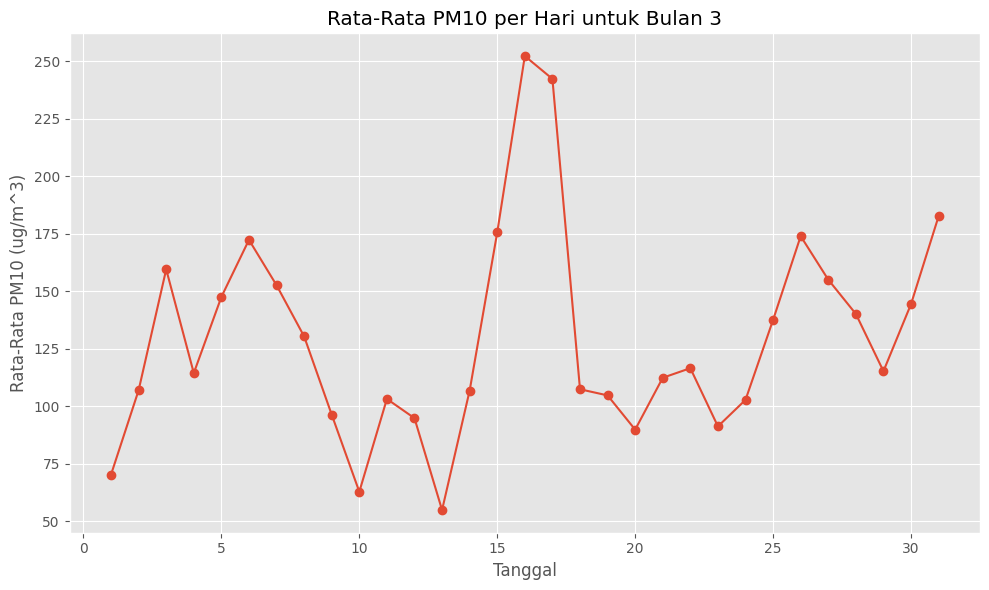

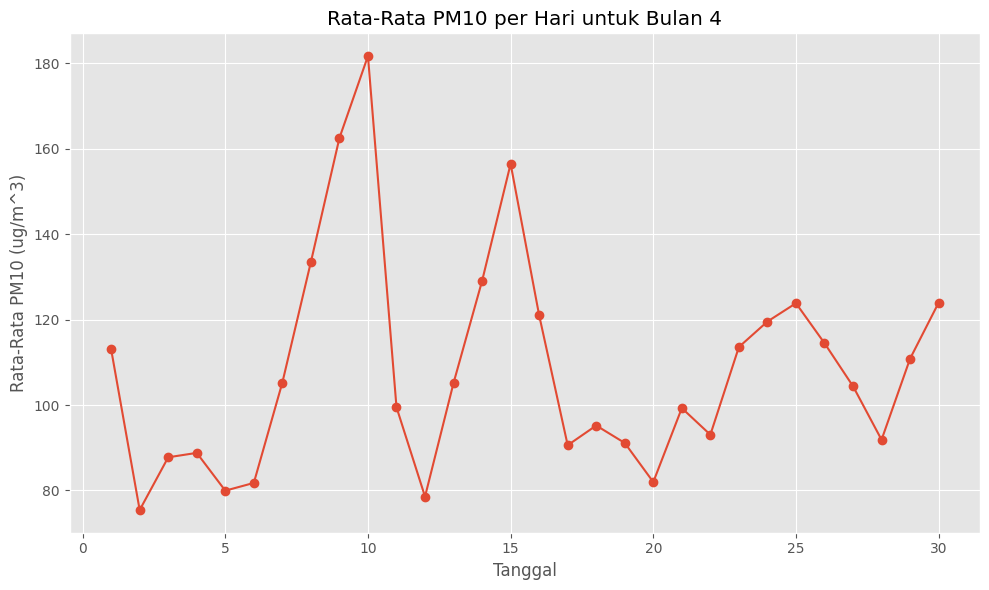

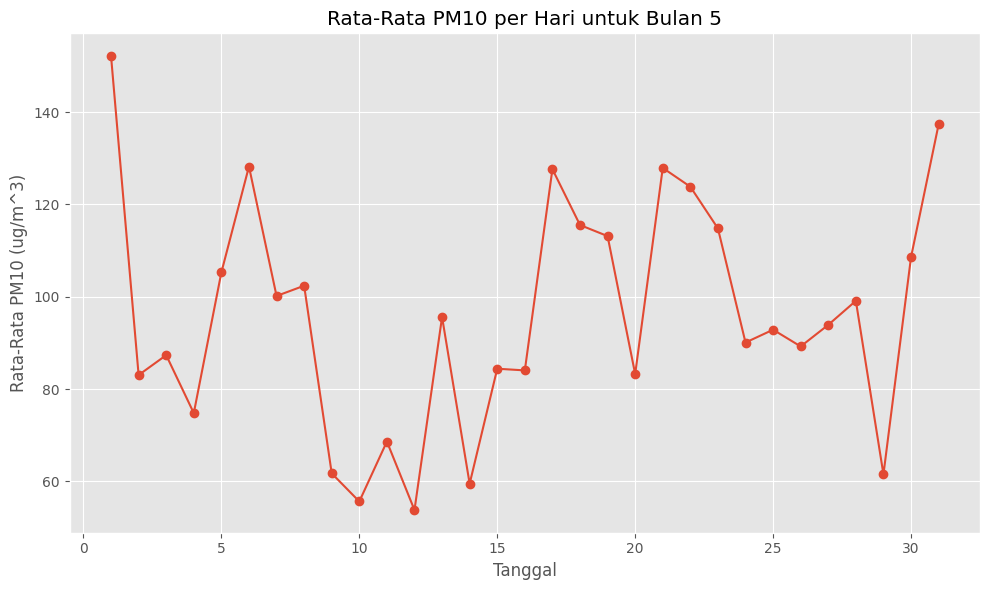

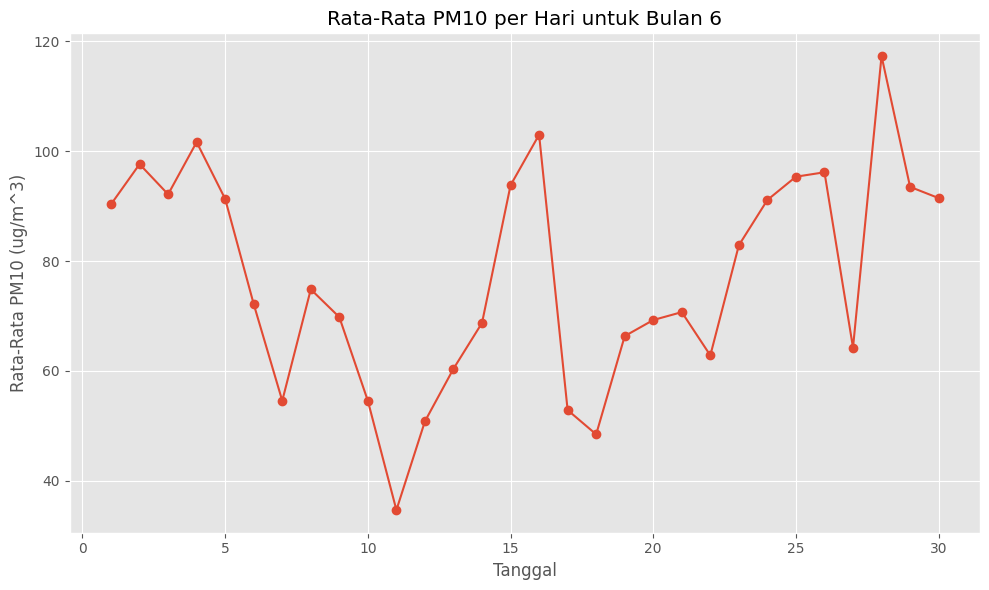

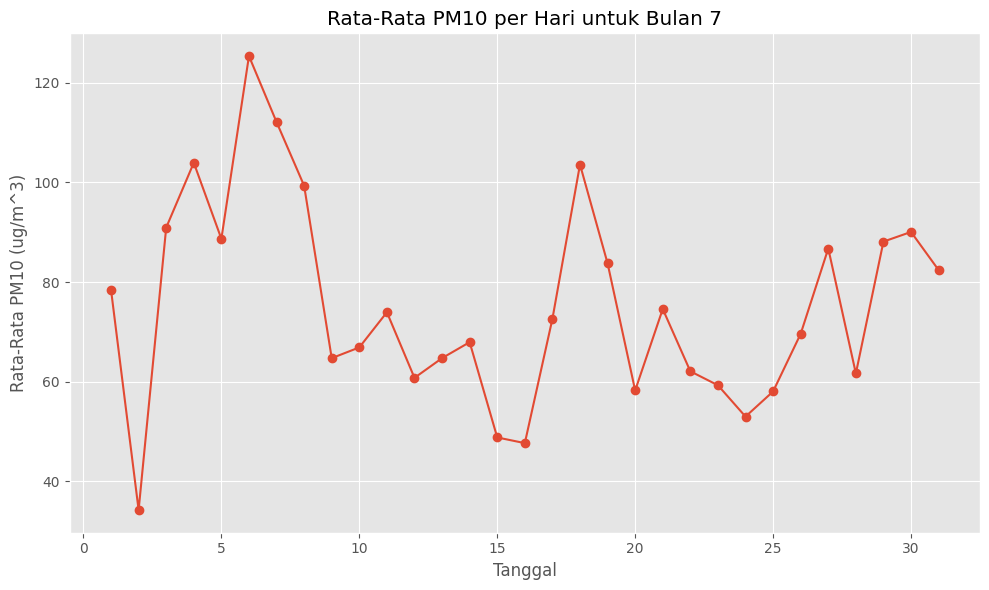

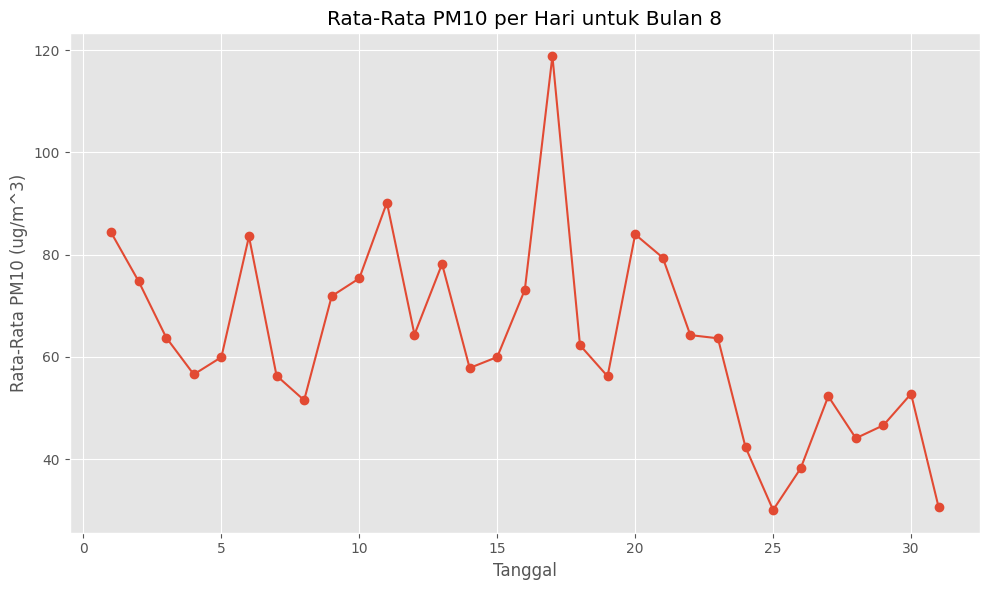

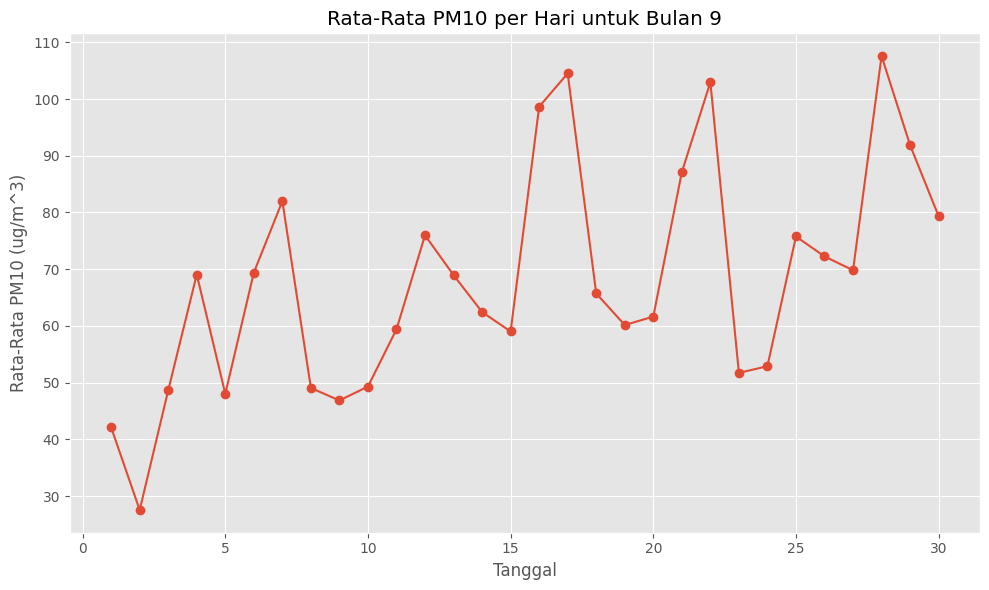

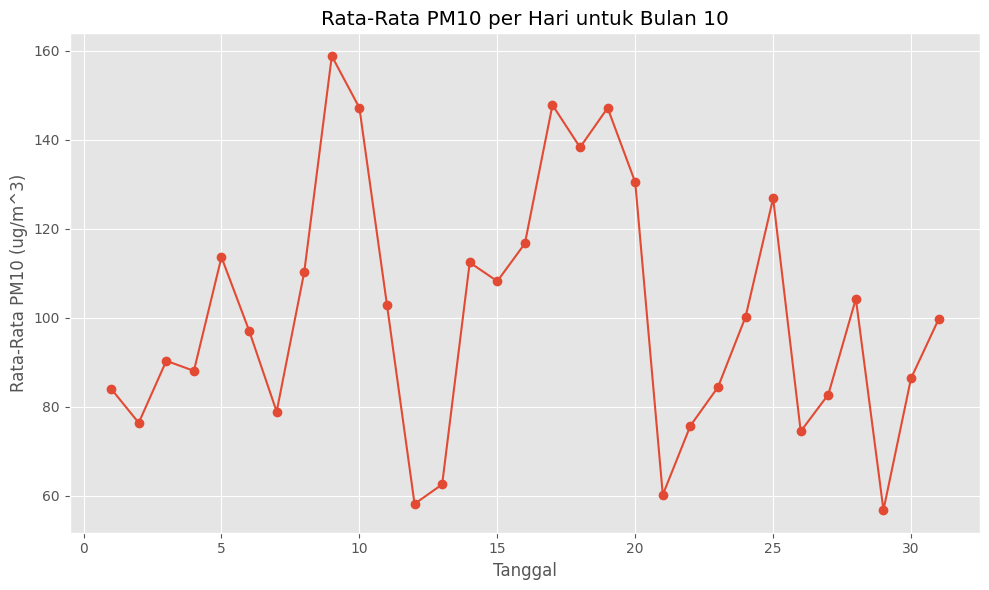

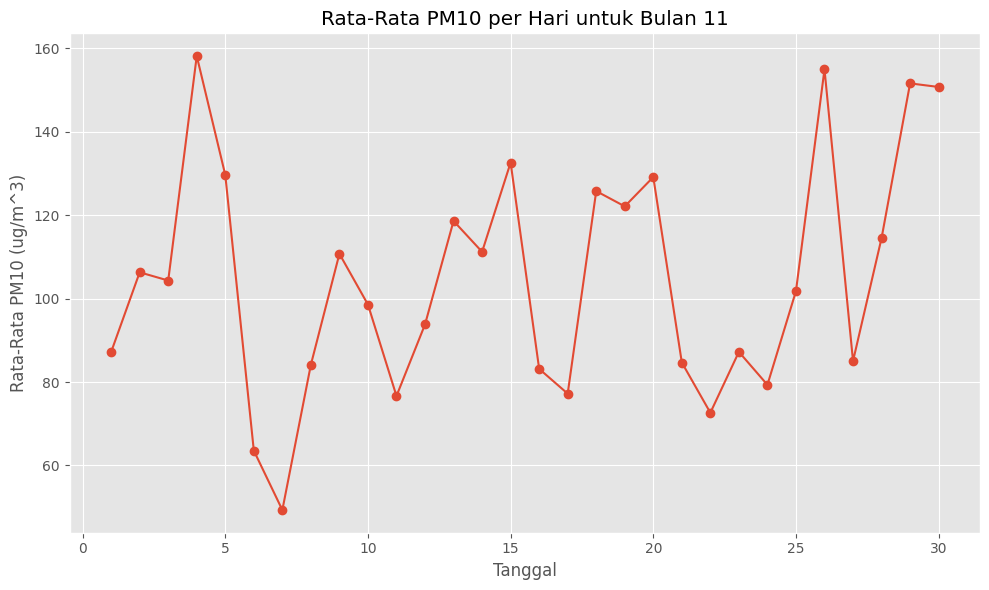

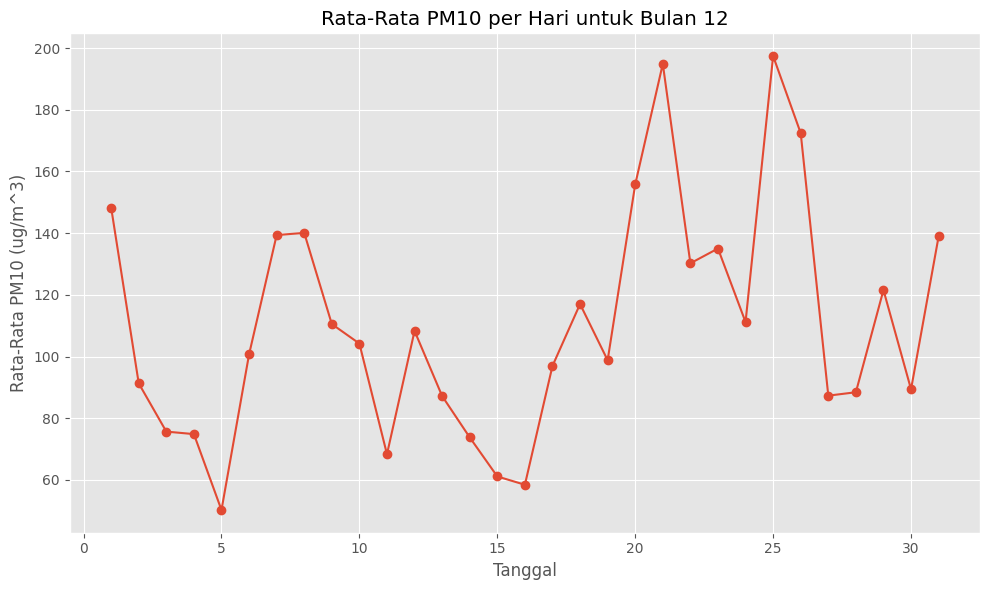

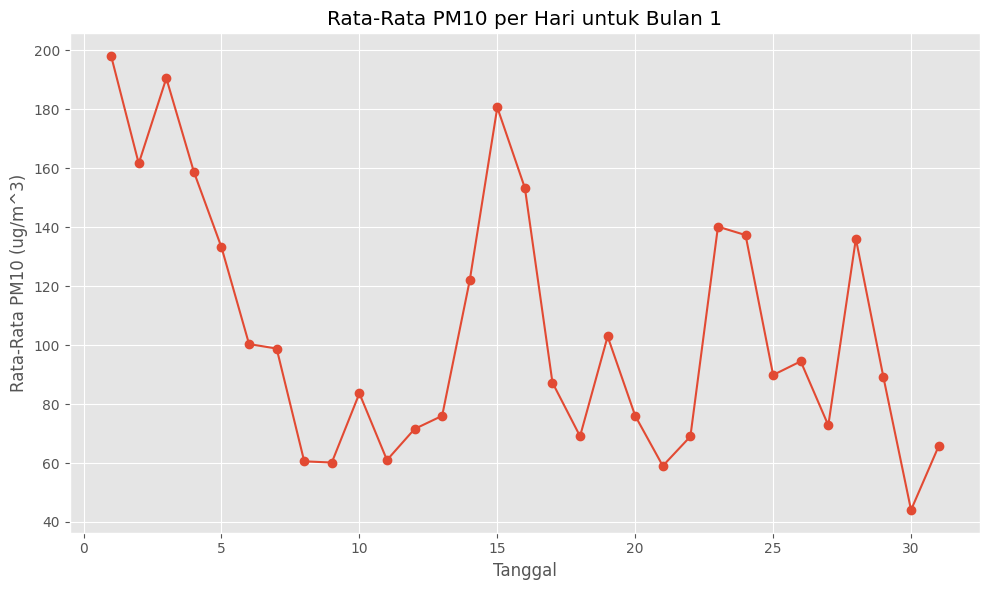

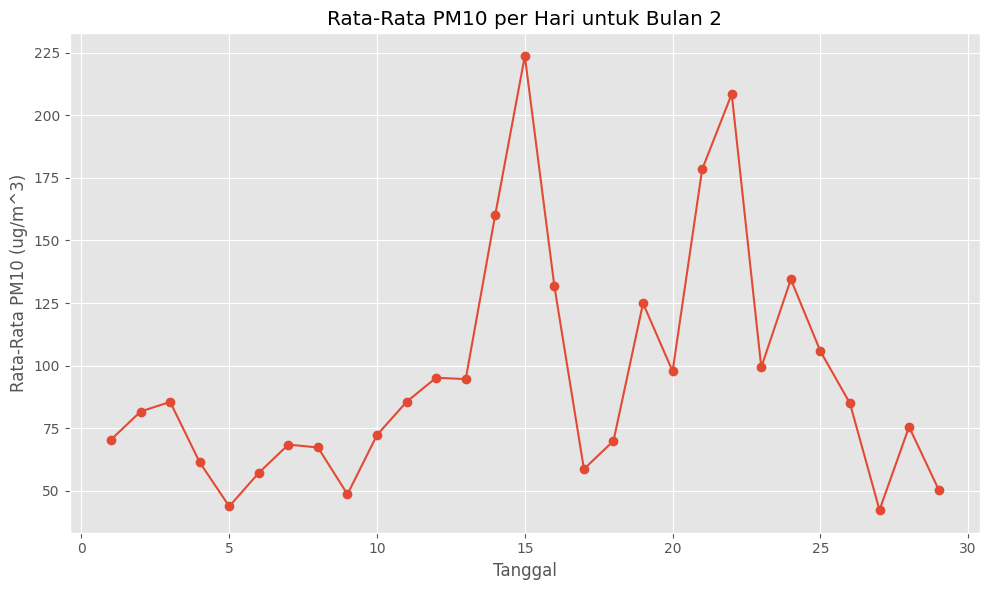

In [49]:

# Membuat kolom bulan dari kolom tanggal
df_filled_mean['tanggal'] = pd.to_datetime(df_filled_mean['year'].astype(str) + '-' + df_filled_mean['month'].astype(str) + '-' + df_filled_mean['day'].astype(str))
df_filled_mean['bulan'] = df_filled_mean['tanggal'].dt.month

# Agregasi data per hari dalam tiap bulan
PM10_per_hari = df_filled_mean.groupby(['bulan', 'day'])['PM10'].mean()

# Membuat plot untuk setiap bulan
unique_months = df_filled_mean['bulan'].unique()

for month in unique_months:
    PM10_bulan = PM10_per_hari.loc[month]
    plt.figure(figsize=(10, 6))
    plt.plot(PM10_bulan.index, PM10_bulan.values, marker='o', linestyle='-')
    plt.title(f'Rata-Rata PM10 per Hari untuk Bulan {month}')
    plt.xlabel('Tanggal')
    plt.ylabel('Rata-Rata PM10 (ug/m^3)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Rata-Rata PM10 per Bulan')

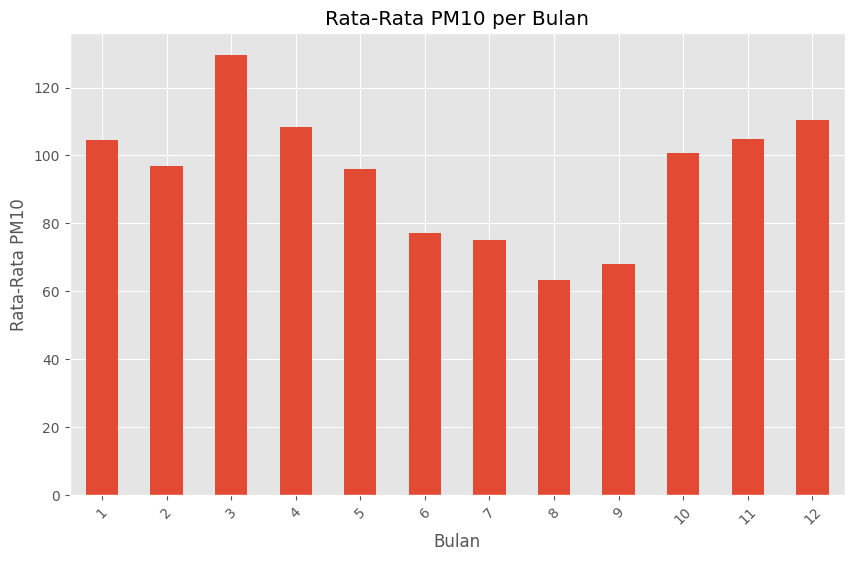

In [46]:
# Menambahkan kolom bulan dari kolom tanggal
df_filled_mean['bulan_tahun'] = pd.to_datetime(df_filled_mean['year'].astype(str) + '-' + df_filled_mean['month'].astype(str))
df_filled_mean['bulan'] = df_filled_mean['bulan_tahun'].dt.month

# Agregasi data per bulan
PM25_per_bulan = df_filled_mean.groupby('bulan')['PM10'].mean()

# Menampilkan diagram batang per bulan untuk PM10
plt.figure(figsize=(10, 6))
PM25_per_bulan.plot(kind='bar')
plt.xlabel('Bulan')
plt.xticks(rotation=45)
plt.ylabel('Rata-Rata PM10')
plt.title('Rata-Rata PM10 per Bulan')

### Pertanyaan 2: Dalam menentukan waktu peluncuran juga dibutuhkan informasi mengenai tingkat suhu di udara karena produk yang akan diluncurkan sangat berhubungan dengan itu. Sehingga dibutuhkan informasi Pada bulan dan tanggal berapa saja suhu udara memiliki kadar tinggi di tahun 2016?

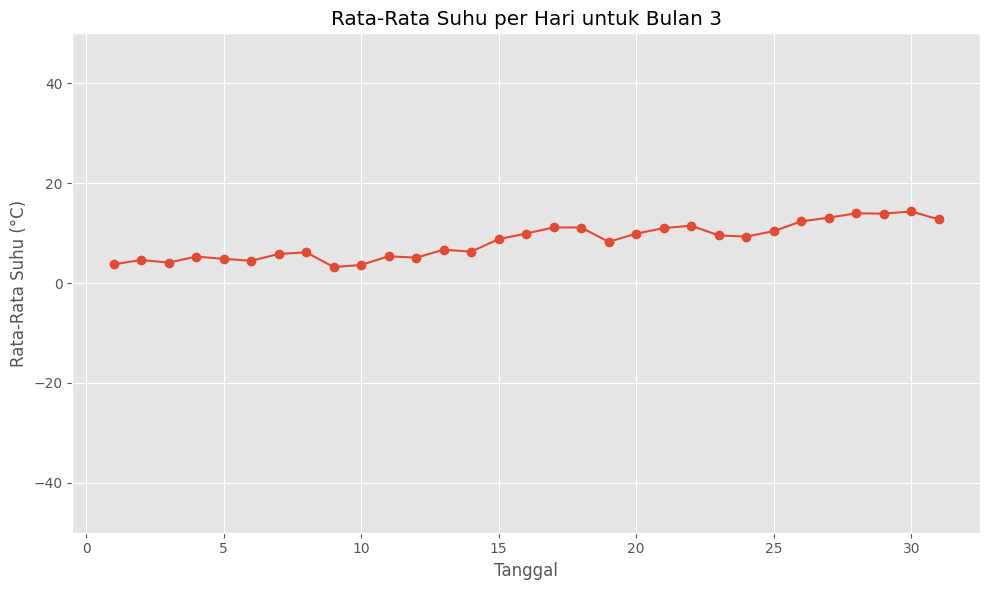

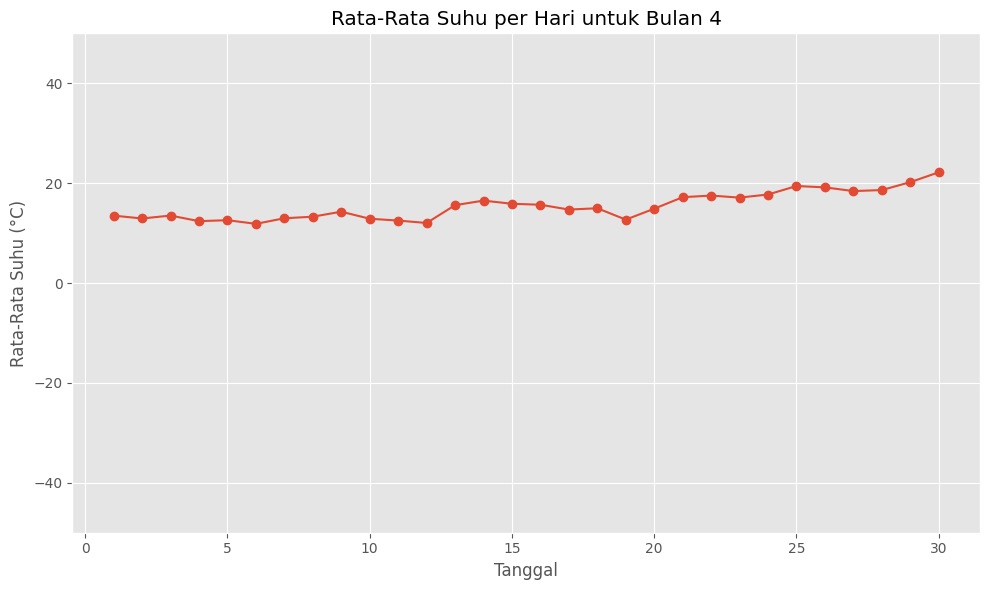

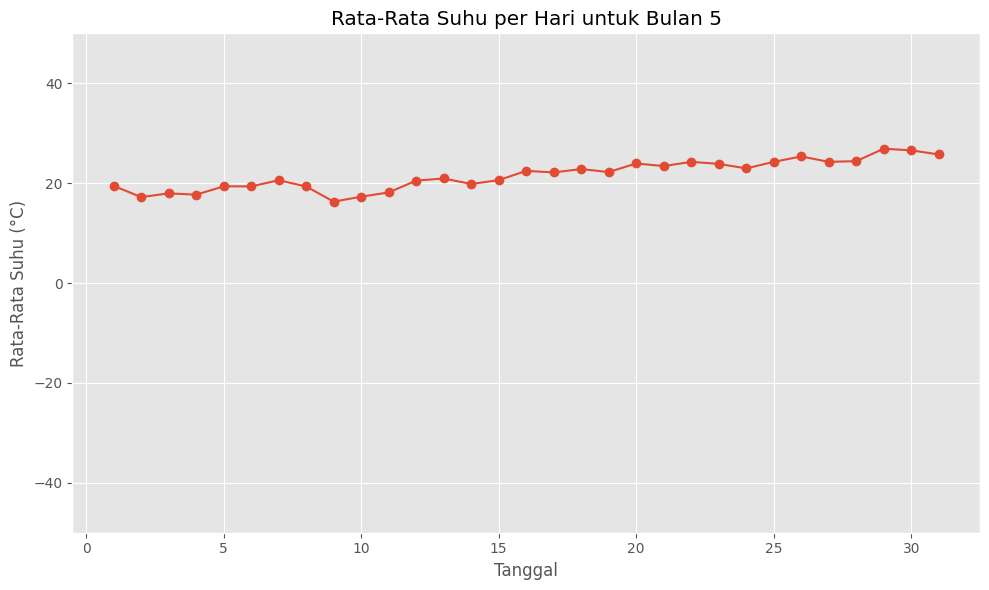

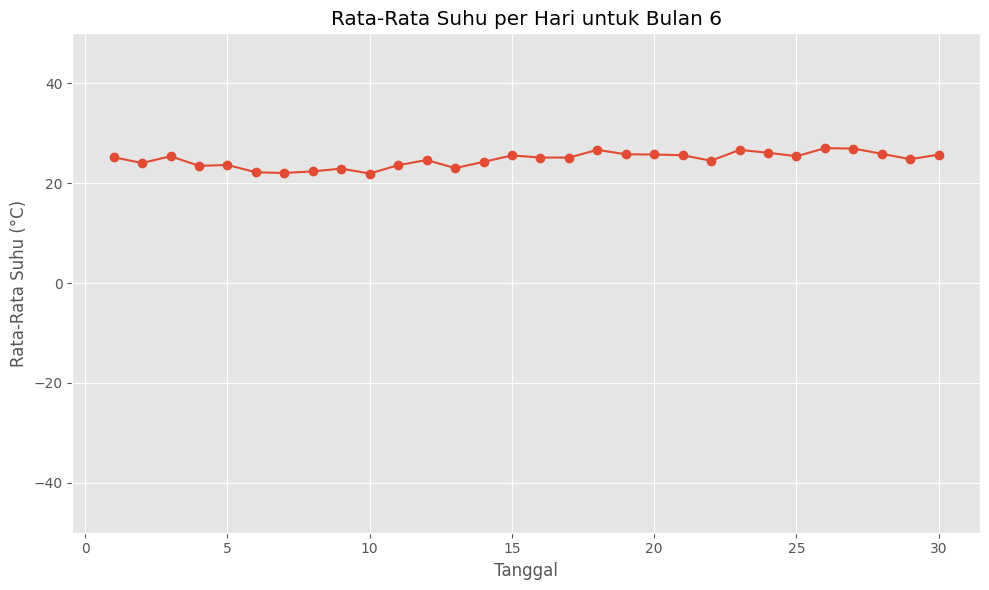

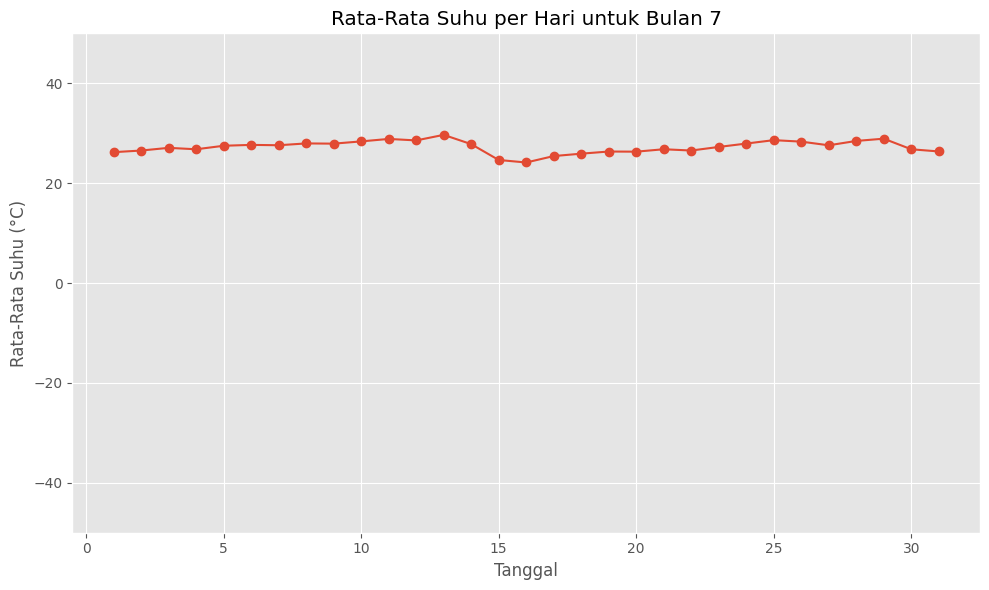

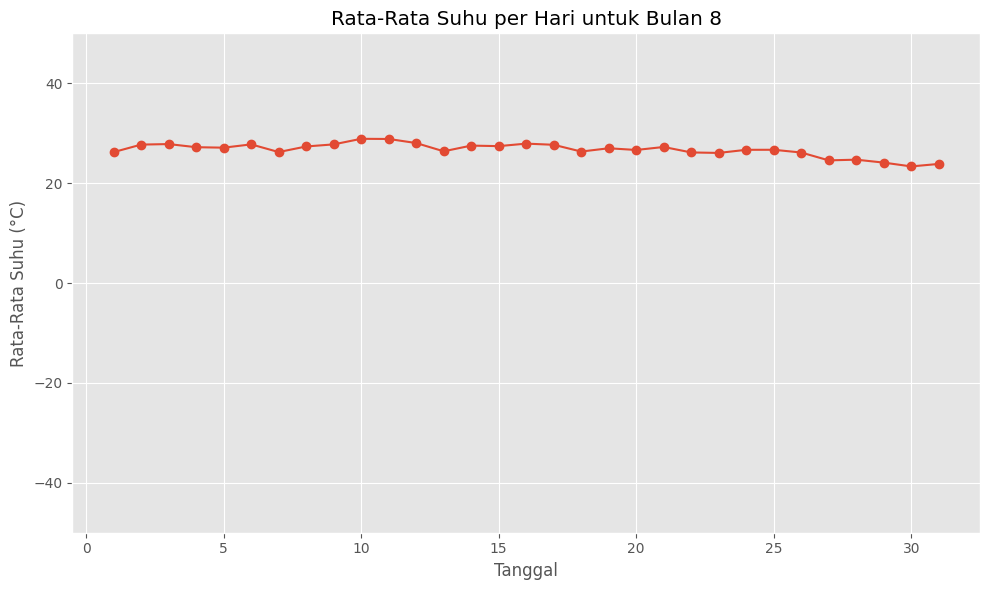

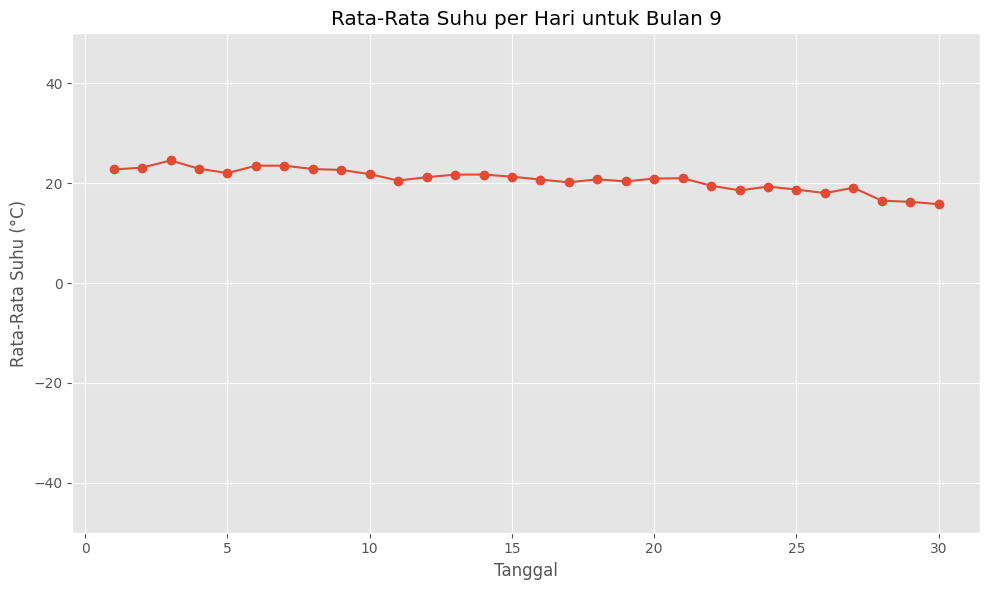

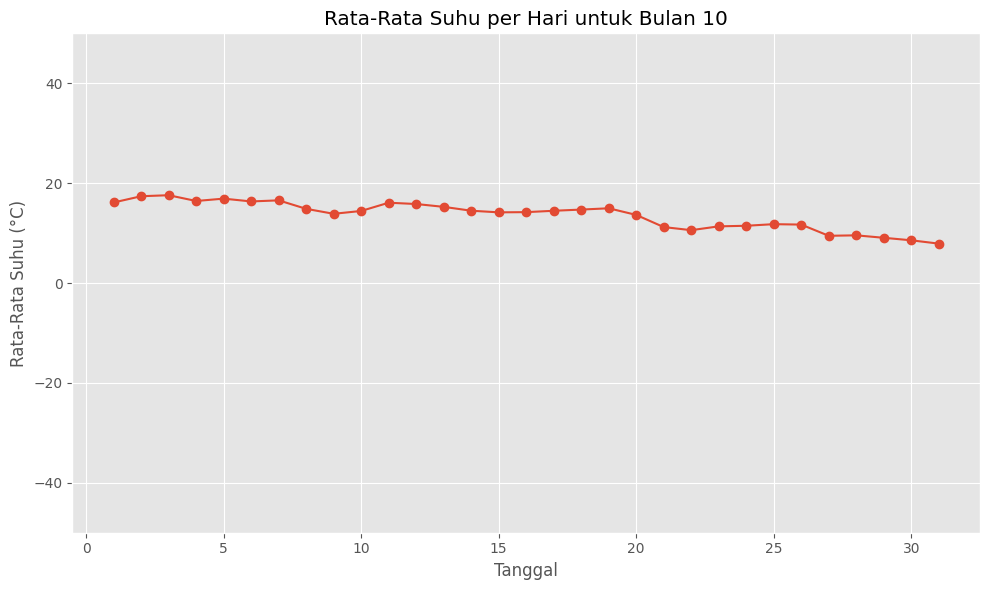

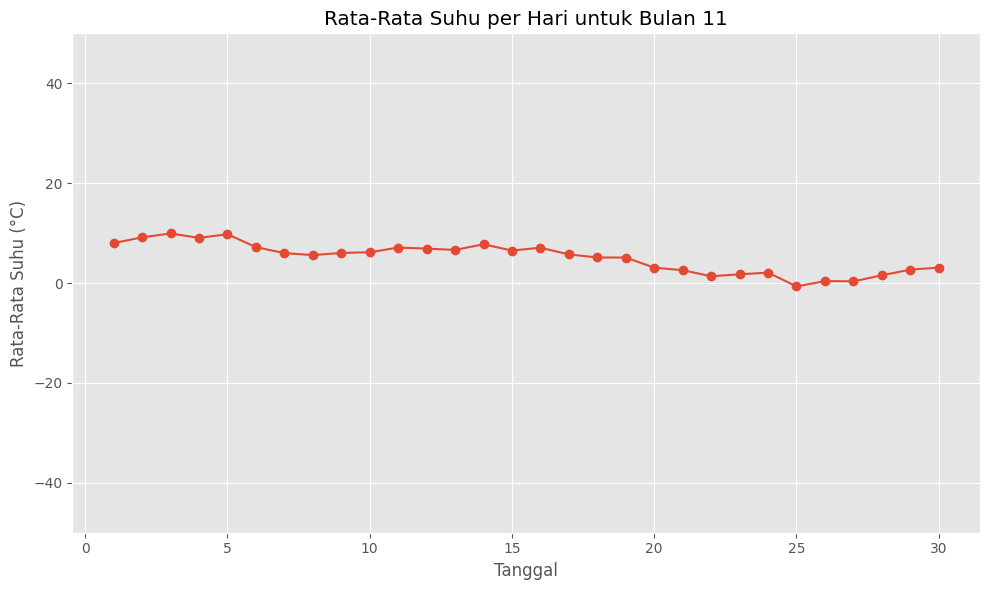

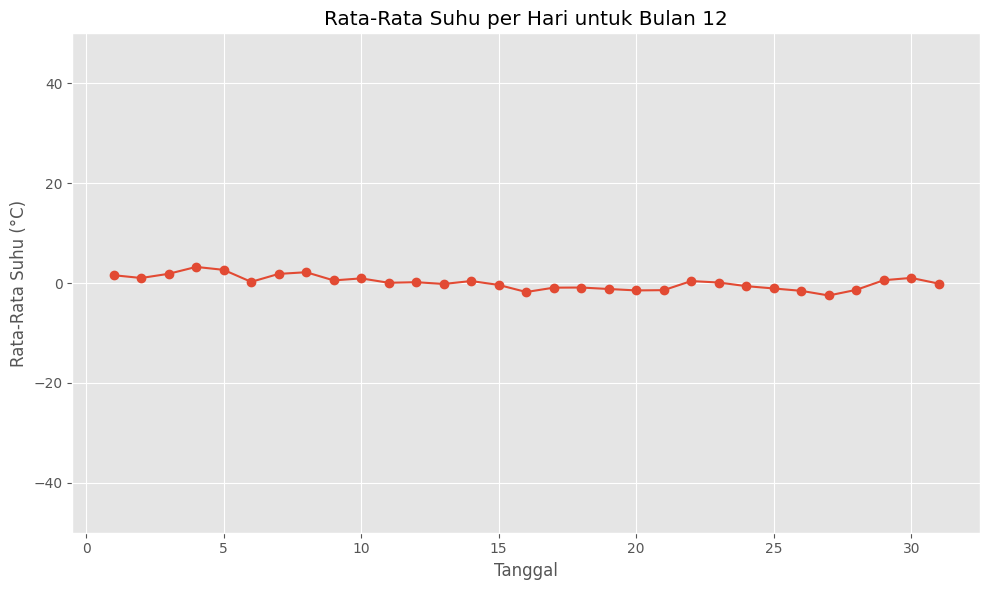

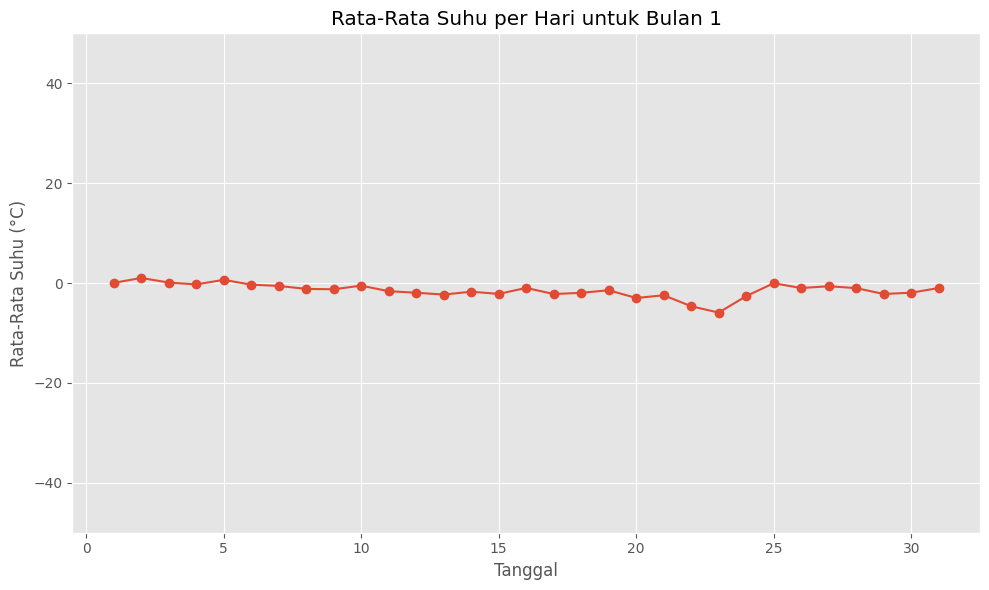

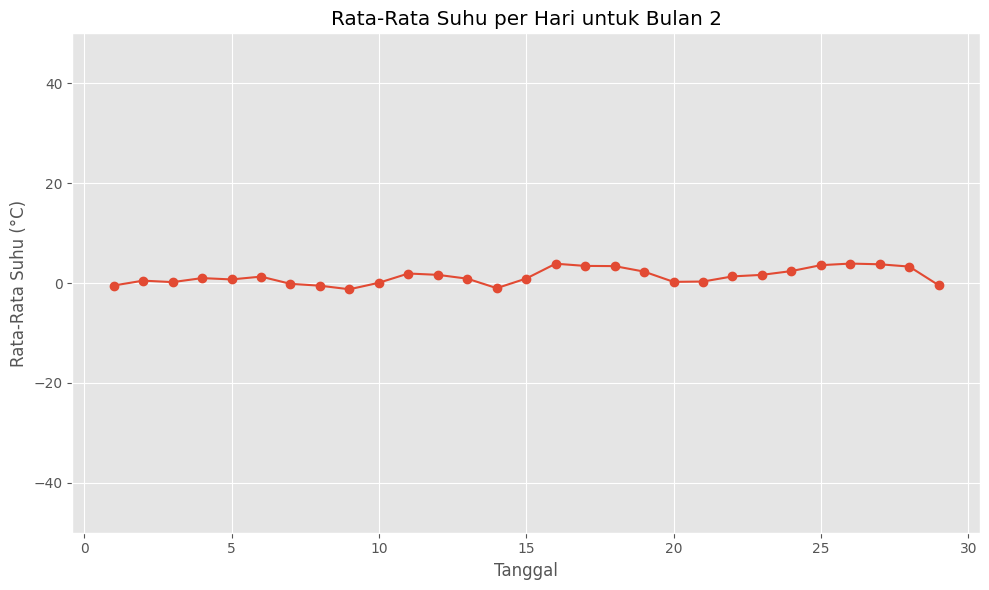

In [52]:

# Agregasi data per hari dalam tiap bulan
suhu_per_hari = df_filled_mean.groupby(['bulan', 'day'])['TEMP'].mean()

# Membuat plot untuk setiap bulan
unique_months = df_filled_mean['bulan'].unique()

for month in unique_months:
    suhu_bulan = suhu_per_hari.loc[month]
    plt.figure(figsize=(10, 6))
    plt.plot(suhu_bulan.index, suhu_bulan.values, marker='o', linestyle='-')
    plt.title(f'Rata-Rata Suhu per Hari untuk Bulan {month}')
    plt.xlabel('Tanggal')
    plt.ylabel('Rata-Rata Suhu (°C)')
    plt.ylim(-50, 50)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Rata-Rata Suhu per Bulan')

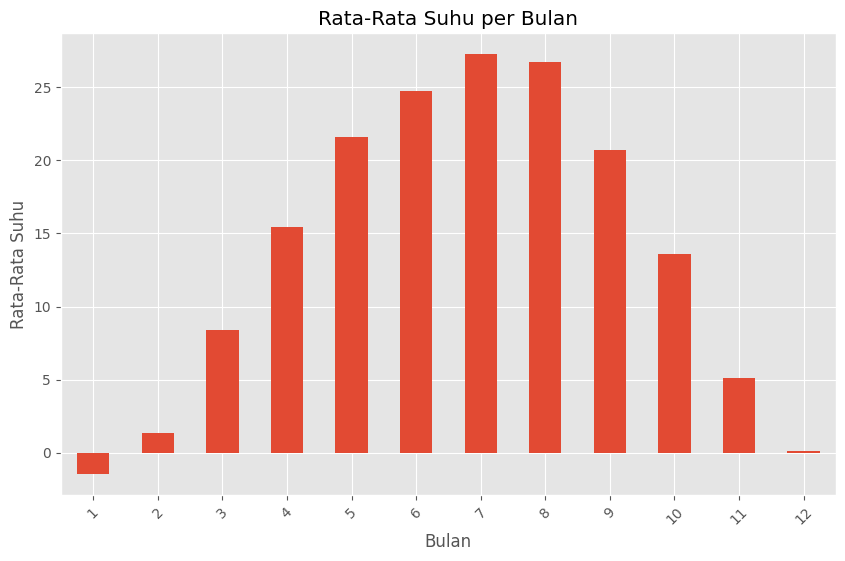

In [53]:
# Agregasi data per bulan
Temp_per_bulan = df_filled_mean.groupby('bulan')['TEMP'].mean()

# Menampilkan diagram batang per bulan untuk PM10
plt.figure(figsize=(10, 6))
Temp_per_bulan.plot(kind='bar')
plt.xlabel('Bulan')
plt.xticks(rotation=45)
plt.ylabel('Rata-Rata Suhu')
plt.title('Rata-Rata Suhu per Bulan')

## Conclusion

**- Conclution pertanyaan 1**

Berdasarkan data PM10 yang diamati, terdapat pola menarik yang dapat ditarik kesimpulan, yaitu adanya kecenderungan konsentrasi PM10 yang tinggi pada pertengahan bulan di setiap bulannya. Hal ini menunjukkan bahwa terdapat faktor-faktor tertentu yang berkontribusi terhadap peningkatan konsentrasi PM10 pada periode tersebut. Kemungkinan faktor-faktor tersebut termasuk aktivitas industri yang meningkat pada pertengahan bulan, peningkatan lalu lintas kendaraan, atau pola cuaca tertentu yang mempengaruhi dispersi polutan.

Kesimpulan ini memberikan wawasan yang berharga dalam perencanaan dan pengambilan keputusan terkait pengendalian polusi udara. Perusahaan atau pihak yang berwenang dapat mempertimbangkan untuk mengadopsi strategi mitigasi yang lebih spesifik dan efektif pada periode pertengahan bulan untuk mengurangi dampak buruk dari konsentrasi PM10 yang tinggi terhadap kesehatan manusia dan lingkungan. Selain itu, analisis ini juga dapat menjadi dasar untuk mengidentifikasi sumber polusi tertentu yang dapat diatasi secara lebih efisien guna meningkatkan kualitas udara secara keseluruhan.

**- Conclution pertanyaan 2**

Berdasarkan analisis tahun 2016, ditemukan bahwa bulan Juli adalah saat di mana suhu udara mencapai kadar tertinggi. Pada tanggal 13 Juli 2016, suhu udara mencapai puncaknya, menunjukkan bahwa ini adalah salah satu periode yang memiliki suhu udara tertinggi dalam tahun tersebut. Oleh karena itu, informasi ini dapat menjadi acuan bagi perusahaan dalam menentukan waktu yang tepat untuk meluncurkan produk yang sensitif terhadap suhu udara seperti produk musim dingin.

In [54]:
# Simpan DataFrame ke dalam file CSV
df_filled_mean.to_csv('Changping_Clean.csv', index=False)